## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [21]:
import pandas
url= "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
data_hf = pandas.read_csv(url)

data_hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

In [64]:
data_hf.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
risk                         object
dtype: object

**Obsahuje dataset duplicitné záznamy?**

In [24]:
print(data_hf.duplicated().sum())


0


### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

In [ ]:
#TODO

**Koľko záznamov mužov a žien obsahuje dataset?**

In [27]:
data_hf['sex'].value_counts()

sex
1    194
0    105
Name: count, dtype: int64

**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

In [28]:
data_hf[data_hf['smoking'] == 0].groupby('sex').size()

sex
0    101
1    102
dtype: int64

### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [ ]:
# TODO

**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

In [32]:
min_age = data_hf['age'].min()
max_age = data_hf['age'].max()
mean_age = data_hf['age'].mean()

min_age, max_age, mean_age

(np.float64(40.0), np.float64(95.0), np.float64(60.83389297658862))

**Z akého veku je v datasete najviac záznamov?**

In [33]:
data_hf['age'].mode()[0]

np.float64(60.0)

### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

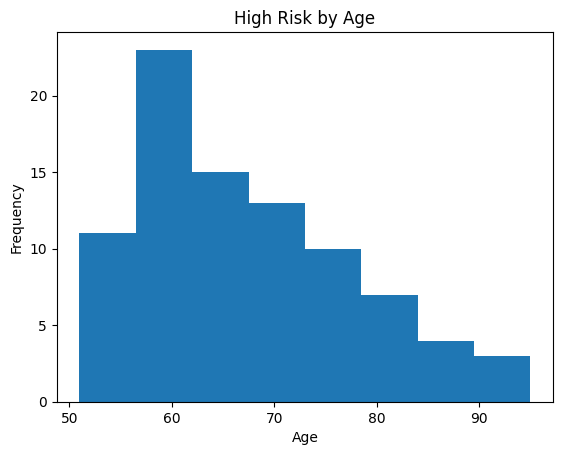

In [34]:
import matplotlib.pyplot as plt
# Add the 'risk' variable
data_hf['risk'] = data_hf.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

# Visualize high risk by age


high_risk = data_hf[data_hf['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

In [ ]:
import matplotlib.pyplot as plt

# Výber pacientov s vysokým rizikom
high_risk = data_hf[data_hf['risk'] == 'High']

# Histogram veku pre vysoké riziko
plt.hist(high_risk['age'], bins=10, edgecolor='black')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**V akom veku je riziko zlyhania srdca najväčšie?**

In [35]:
highest_risk_age = high_risk['age'].mode()[0]
highest_risk_age

np.float64(60.0)

**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

In [39]:
high_risk['age'].value_counts()[highest_risk_age]

np.int64(18)

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


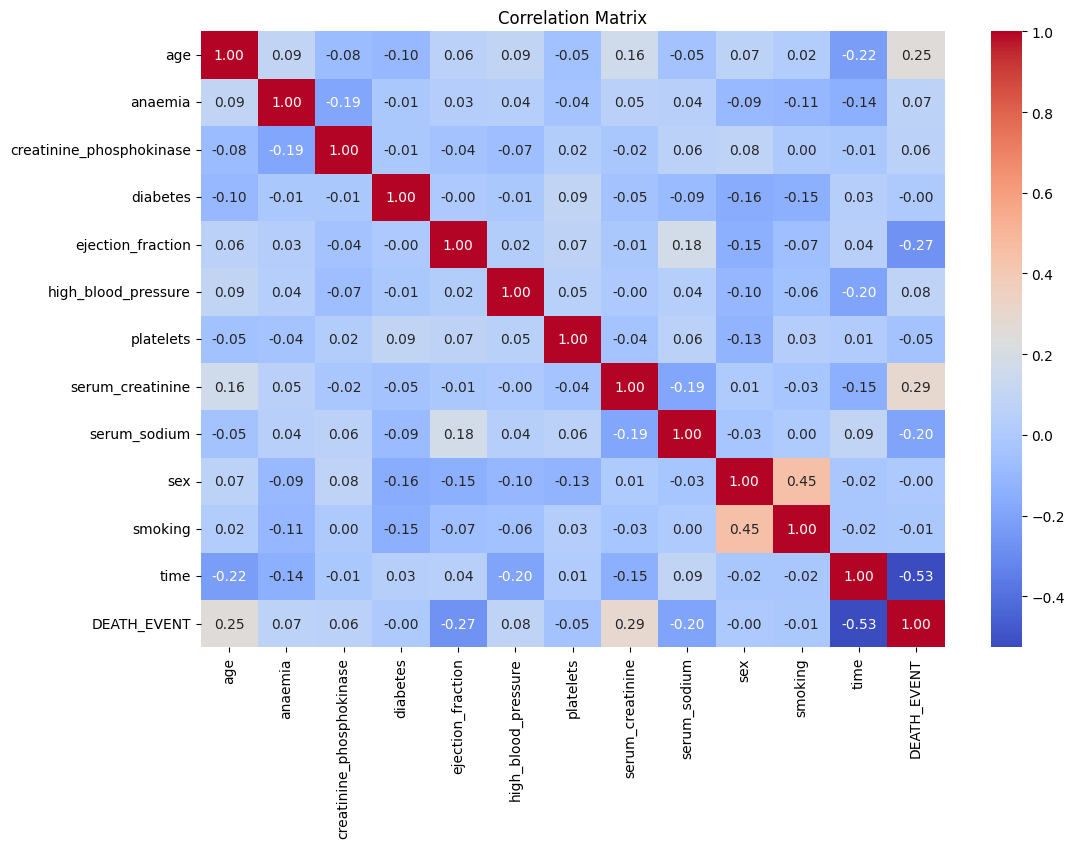

In [40]:
import seaborn as sns
numeric_data_hf = data_hf.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data_hf.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

In [59]:
correlation_matrix = numeric_data_hf.corr()

correlation_pairs = correlation_matrix.unstack().sort_values()
negative_corr = correlation_pairs[correlation_pairs < 0].head(4)
negative_corr


DEATH_EVENT        time                -0.526964
time               DEATH_EVENT         -0.526964
ejection_fraction  DEATH_EVENT         -0.268603
DEATH_EVENT        ejection_fraction   -0.268603
dtype: float64

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

In [63]:
correlation_pairs = correlation_pairs[correlation_pairs < 1]

positive_corr = (correlation_pairs[correlation_pairs > 0].tail(4))
positive_corr

DEATH_EVENT       serum_creatinine    0.294278
serum_creatinine  DEATH_EVENT         0.294278
sex               smoking             0.445892
smoking           sex                 0.445892
dtype: float64

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure